# Requirements

In [196]:
# Add as many imports as you need.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [260]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/climate-data.csv')

Explore the dataset using visualizations of your choice.

In [74]:
# Write your code here. Add as many boxes as you need.
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


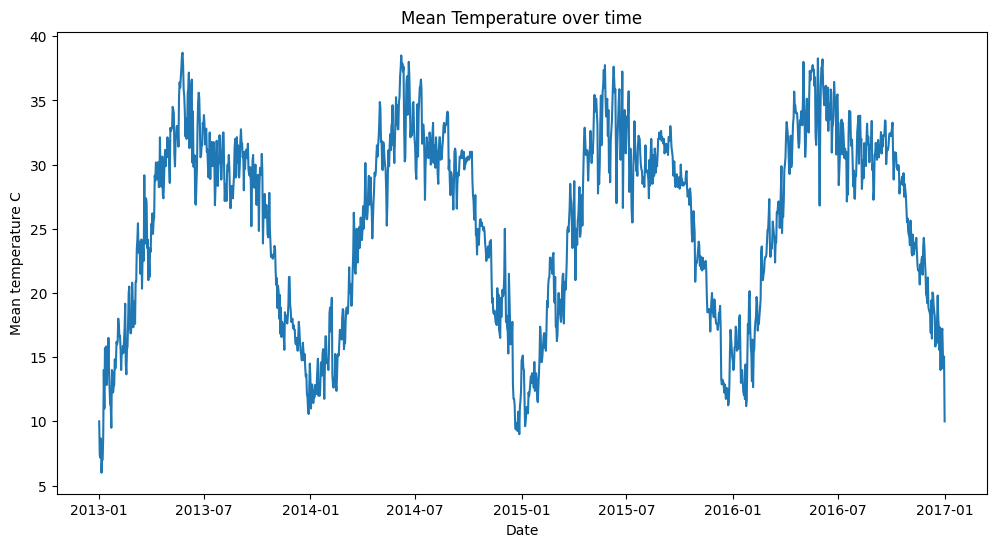

In [76]:
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df['date']), df['meantemp'])
plt.title('Mean Temperature over time')
plt.xlabel('Date')
plt.ylabel('Mean temperature C')
plt.show()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [262]:
# Write your code here. Add as many boxes as you need.
features = [col for col in df.columns if col not in ['date']]
features

['meantemp', 'humidity', 'wind_speed', 'meanpressure']

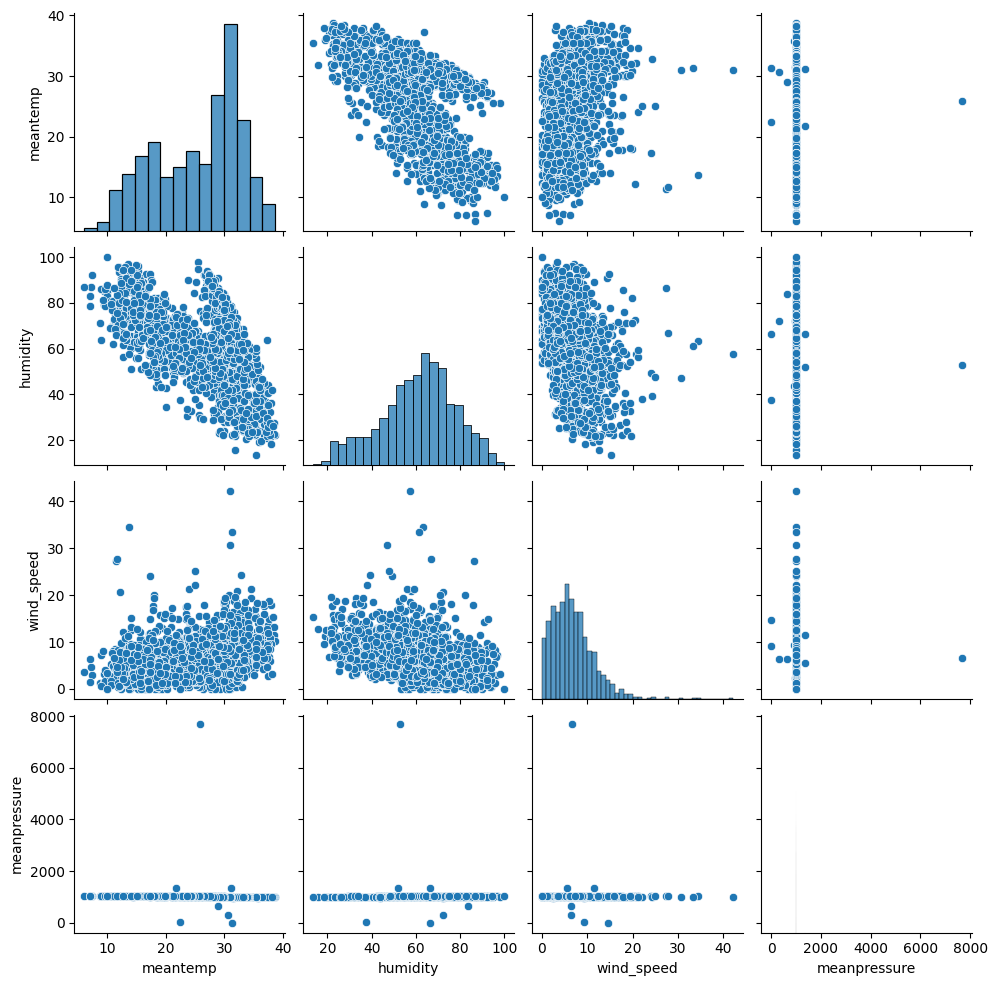

In [84]:
sns.pairplot(df[features])
plt.show()

<Axes: >

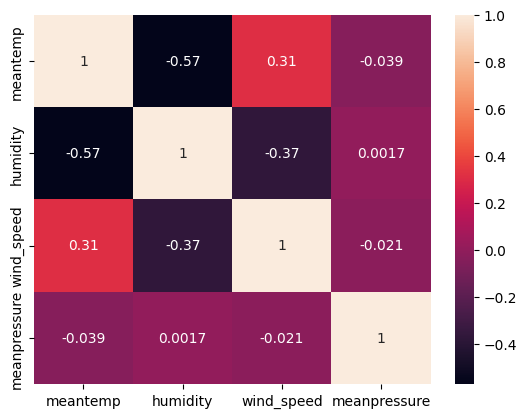

In [32]:
sns.heatmap(df[features].corr(), annot=True)

In [264]:
df['date'] = pd.to_datetime(df['date'])

In [266]:
df.set_index(keys = 'date')

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [268]:
# so features odvoeno 

for lag in range(1, 4):
    for col in features:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

In [270]:
df.isnull().sum()

date                 0
meantemp             0
humidity             0
wind_speed           0
meanpressure         0
meantemp_lag1        1
humidity_lag1        1
wind_speed_lag1      1
meanpressure_lag1    1
meantemp_lag2        2
humidity_lag2        2
wind_speed_lag2      2
meanpressure_lag2    2
meantemp_lag3        3
humidity_lag3        3
wind_speed_lag3      3
meanpressure_lag3    3
dtype: int64

In [272]:
df = df.dropna().reset_index(drop=True)

In [112]:
df

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,humidity_lag1,wind_speed_lag1,meanpressure_lag1,meantemp_lag2,humidity_lag2,wind_speed_lag2,meanpressure_lag2,meantemp_lag3,humidity_lag3,wind_speed_lag3,meanpressure_lag3
0,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
1,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
3,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
4,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
1455,2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
1456,2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000
1457,2016-12-31,15.052632,87.000000,7.325000,1016.100000,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217


In [114]:
df.isnull().sum()

date                 0
meantemp             0
humidity             0
wind_speed           0
meanpressure         0
meantemp_lag1        0
humidity_lag1        0
wind_speed_lag1      0
meanpressure_lag1    0
meantemp_lag2        0
humidity_lag2        0
wind_speed_lag2      0
meanpressure_lag2    0
meantemp_lag3        0
humidity_lag3        0
wind_speed_lag3      0
meanpressure_lag3    0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [274]:
# Write your code here. Add as many boxes as you need.
features = [col for col in df.columns if col not in ['date', 'humidity', 'wind_speed', 'meanpressure', 'meantemp']]

In [276]:
features

['meantemp_lag1',
 'humidity_lag1',
 'wind_speed_lag1',
 'meanpressure_lag1',
 'meantemp_lag2',
 'humidity_lag2',
 'wind_speed_lag2',
 'meanpressure_lag2',
 'meantemp_lag3',
 'humidity_lag3',
 'wind_speed_lag3',
 'meanpressure_lag3']

In [278]:
x = df[features]
y = df['meantemp']

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [282]:
x_train

,meantemp_lag1,humidity_lag1,wind_speed_lag1,meanpressure_lag1,meantemp_lag2,humidity_lag2,wind_speed_lag2,meanpressure_lag2,meantemp_lag3,humidity_lag3,wind_speed_lag3,meanpressure_lag3
0,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
1,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
3,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
4,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,25.562500,57.437500,7.981250,1013.187500,24.000000,57.562500,9.375000,1012.062500,23.428571,60.214286,6.742857,1011.642857
1163,25.066667,67.800000,6.546667,1012.533333,25.562500,57.437500,7.981250,1013.187500,24.000000,57.562500,9.375000,1012.062500
1164,24.562500,66.937500,9.487500,1009.562500,25.066667,67.800000,6.546667,1012.533333,25.562500,57.437500,7.981250,1013.187500
1165,24.250000,65.187500,6.843750,1011.187500,24.562500,66.937500,9.487500,1009.562500,25.066667,67.800000,6.546667,1012.533333


In [284]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [286]:
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [288]:
# Write your code here. Add as many boxes as you need.
model = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state=42)

model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=42)

Use the trained model to make predictions for the test set.

In [290]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_test)

In [292]:
y_pred = np.array(y_pred)

# Reshape y_pred to a 2D array with one column
y_pred = y_pred.reshape(-1, 1)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)

In [294]:
y_pred 

array([[23.87600199],
       [24.17964379],
       [25.82497458],
       [26.02070579],
       [26.62192287],
       [26.87636167],
       [26.17829591],
       [24.47604527],
       [27.41400432],
       [27.50256649],
       [30.12952297],
       [23.97623625],
       [26.38819579],
       [26.23627544],
       [26.31874475],
       [27.97251085],
       [30.20410742],
       [30.62902597],
       [32.20831223],
       [33.03585428],
       [32.47474111],
       [32.16989249],
       [31.86753555],
       [30.23264733],
       [29.83973919],
       [30.47780773],
       [32.09545052],
       [29.77885272],
       [30.28792573],
       [31.21862455],
       [33.61941884],
       [33.08536236],
       [34.09350383],
       [33.38413354],
       [32.68724934],
       [32.07093136],
       [32.28329203],
       [32.98562742],
       [33.54230204],
       [31.23666973],
       [31.01294843],
       [30.99724844],
       [32.76339457],
       [32.34710019],
       [33.22126033],
       [32

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [296]:
r2_score(y_test, y_pred)

0.9053171903008413

In [298]:
mean_squared_error(y_test, y_pred)

3.0328348665046416

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [316]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.1, shuffle=False)

In [320]:
# Write your code here. Add as many boxes as you need.
model2 = XGBRegressor(n_estimators=100, random_state = 42)

model2.fit(x_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [322]:
# Write your code here. Add as many boxes as you need.
y_pred2 = model2.predict(x_test1)

In [326]:
r2_score(y_test1, y_pred2)

0.9228016954135647

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [328]:
# Write your code here. Add as many boxes as you need.
mean_squared_error(y_test1, y_pred2)

2.513804321743598

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [332]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators' : [50, 100, 150, 200]
}

tss = TimeSeriesSplit(n_splits = 5)
grid_search = GridSearchCV(estimator = XGBRegressor(),param_grid = param_grid, scoring = 'neg_mean_squared_error')

grid_search.fit(x_train1, y_train1)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [340]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'n_estimators': 50}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
-3.5045560735087404


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [344]:
# Write your code here. Add as many boxes as you need.
final_xgb_model = XGBRegressor(n_estimators = grid_search.best_params_['n_estimators'], random_state=42)

final_xgb_model.fit(x_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [346]:
y_pred_Final = final_xgb_model.predict(x_test1)

In [348]:
r2_score(y_test1, y_pred_Final)

0.9254237193221249